# LIbrary

In [1]:
import numpy as np
import pandas as pd
#import plotly.express as px
import nltk
#!pip install tensorflow
import tensorflow as tf
import keras
# keras.preprocessing.text import Tokenizer
from keras.activations import *
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.layers import Flatten, Bidirectional, BatchNormalization, Reshape
from keras.layers import Dense, GlobalAveragePooling2D, multiply
from keras.models import Model
from keras import preprocessing, Input
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
import gensim
from keras.utils.vis_utils import plot_model

#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from keras.layers import BatchNormalization

#from keras.layers.rnn.bidirectional import Bidirectional
from keras.layers import LSTM, BatchNormalization, Dropout, Dense
from keras.models import Sequential
import re
from PIL import Image, ImageFile
import seaborn as sns
from sklearn import metrics
np.random.seed(0)
!pip install keras_preprocessing
from keras_preprocessing.sequence import pad_sequences
adam = keras.optimizers.Adam(lr=1e-3) # Optimizer Adam

from tensorflow.keras.applications.efficientnet import preprocess_input

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from keras.layers.rnn.bidirectional import Bidirectional

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


Mounted at /content/drive


# LINK and Dataset

In [3]:
# Read the dataset
outputPath =  "/content/drive/MyDrive/dataset_copy/output_result/"
word2vec_path="/content/drive/MyDrive/amharic-word2vec-300D.gz"
dataset_path= "/content/drive/MyDrive/dataset_copy/preprocessed_combined_dataset_11_unequall_.xlsx"

img_dir = "/content/drive/MyDrive/dataset_copy/IMG/"

In [4]:
col_names = ['image', 'text', 'Lable']
dataset = pd.read_excel(dataset_path, header=0, names=col_names)
label_map = {'normal speech': 0, 'hate speech': 1}
dataset["Lable"] = dataset["Lable"].map(label_map)

In [5]:
#print(dataset[dataset['text'].apply(lambda x: len(x.split())) <= 1])


# Preprocessing

In [6]:
# Convert any non-string values in the text column to strings
df=dataset
df['text'] = df['text'].astype(str)

# Preprocess the text by tokenizing and removing stop words
sentences = df['text'].tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
max_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Combine the padded sequences with the image column
X = pd.concat([df[['image']], pd.DataFrame(padded_sequences)], axis=1)
y = df['Lable']

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.10, random_state=14)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.11, random_state=42)

In [7]:
df['text'][427]

'አማራ የራሱን ተወካይ ይመርጣል እንጂ አብይ ሊልክለት አይችልም ኦሮሞን እዚያው ወደ ራስህ ክልል ውሰደው'

In [8]:
print(df['text'][427])
print(sequences[427])
print(padded_sequences[427])

አማራ የራሱን ተወካይ ይመርጣል እንጂ አብይ ሊልክለት አይችልም ኦሮሞን እዚያው ወደ ራስህ ክልል ውሰደው
[2, 483, 768, 1366, 3454, 3455, 3456, 179, 1367, 1368, 3457, 769, 3458, 1369]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    2  483  768 1366 3454 3455 3456  179 1367 1368 3457  769 3458 1369]


In [9]:
word_index

{'nan': 1,
 'አማራ': 2,
 'የአማራ': 3,
 'ፋኖ': 4,
 'ሲልህ': 5,
 'አመት': 6,
 'ሄደህ': 7,
 'አድስ': 8,
 'ሀይል': 9,
 'ተማሪ': 10,
 'መንገድ': 11,
 'አበባ': 12,
 'ሰላም': 13,
 'ልዩ': 14,
 'ውጤት': 15,
 'በሀላ': 16,
 'እንዴት': 17,
 'በአማራ': 18,
 'ሴቶች': 19,
 'ሆነህ': 20,
 'ሲሉህ': 21,
 'ግቢ': 22,
 'አርሰናል': 23,
 'አም': 24,
 'ድል': 25,
 'ስታይ': 26,
 'ስትል': 27,
 'ደም': 28,
 'ቤተሰብ': 29,
 'እንጀራ': 30,
 'ጠቅላይ': 31,
 'ትምህርት': 32,
 'ስትለው': 33,
 'ብልፅግና': 34,
 'ዘመድኩን': 35,
 'ፊልም': 36,
 'ኦርቶዶክስ': 37,
 'አቡነ': 38,
 'ቀበሌ': 39,
 'መብራት': 40,
 'ህዝባዊ': 41,
 'ጎንደር': 42,
 'አባ': 43,
 'ጌታቸው': 44,
 'ቂልጡ': 45,
 'ጀለስ': 46,
 'ቢሮ': 47,
 'ባንክ': 48,
 'ወንጀል': 49,
 'ጦርነት': 50,
 'ውሀ': 51,
 'ቆይታ': 52,
 'ቤተክርስቲያን': 53,
 'ምክር': 54,
 'ከመምህር': 55,
 'ቤተ': 56,
 'ሚኒስቴር': 57,
 'ፓርቲ': 58,
 'ጀለስህ': 59,
 'አዳነች': 60,
 'መልእክት': 61,
 'መቶ': 62,
 'ሚኒስትር': 63,
 'አስተዳደር': 64,
 'ይልቃል': 65,
 'ጃል': 66,
 'እጅ': 67,
 'ቀይ': 68,
 'ፎቶ': 69,
 'ሲመጣ': 70,
 'ወለጋ': 71,
 'ኦሮሞ': 72,
 'ዩኒቨርሲቲ': 73,
 'ሰበር': 74,
 'ብለው': 75,
 'ይሄን': 76,
 'ምግብ': 77,
 'ታሪክ': 78,
 'አንድት': 79,
 'መከላከያ': 80,
 'ሚድያ': 81,
 '

<Axes: xlabel='Lable', ylabel='count'>

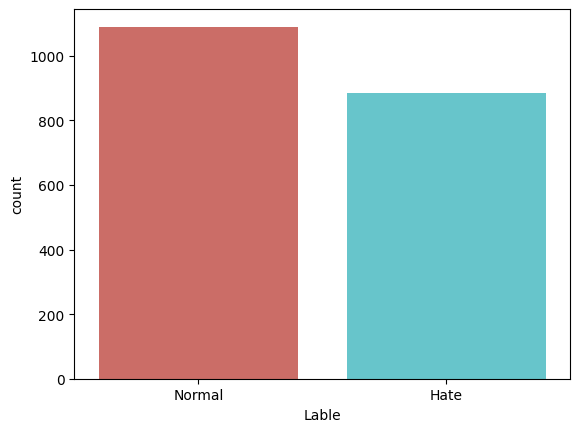

In [10]:
import seaborn as sb
def create_distribution(dataFile):
    plot = sb.countplot(x='Lable', data=dataFile, palette='hls')
    plot.set_xticklabels(['Normal', 'Hate'])
    return plot
create_distribution(dataset)

In [11]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=False)

In [12]:
#word2vec_model.most_similar('ፕሬዚዳንት')

In [13]:
# unk_token_index = tokenizer_df.word_index['unk']
# num_unk_tokens = np.sum(np.array(df_sequence) == unk_token_index)
# print("Number of 'unk' tokens: ", num_unk_tokens)

In [14]:

embedding_dim = word2vec_model.vector_size
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i > num_words:
        break
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]

In [15]:
np.save(outputPath+'embedding_matrix_1.npy', embedding_matrix)

# Load the saved file and check if it matches the original embedding_matrix
#embedding_matrix = np.load(outputPath+'embedding_matrix_last_.npy')

# **TEXT** **MODEL** **DEVELOPMENT**

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)


In [16]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

## BiLSTM model development

In [ ]:
#max_len=max_len+1
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_t = Sequential()
model_t.add(Embedding(num_words, output_dim=embedding_dim, weights=
 [embedding_matrix], input_length=max_len+1, trainable=False))
model_t.add(Bidirectional(LSTM(32, return_sequences=True)))
model_t.add(BatchNormalization())
model_t.add(Dropout(0.2))
model_t.add(LSTM(64))
model_t.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_t.add(Dropout(0.2))
model_t.add(Dense(2, activation='softmax'))

model_t.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model_t.fit(X_train, y_train, epochs=32, batch_size=32, validation_data=(X_val, y_val))

In [ ]:
plot_model(model_t, to_file=outputPath+'BiLSTM_model.png', show_shapes=True, show_layer_names=True)
# Saving text model
#model_t.save(outputPath+'LSTM_text_model.h5')

In [ ]:
# Plotting training and validation accuracy and loss for combined model
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('BiLSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model_t.evaluate(X_test, y_test)

# Get the last accuracy value for training and testing
train_acc_last = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)
print("Last accuracy value for validation: ", val_acc)

10/10 [==============================] - 1s 113ms/step - loss: 1.5960 - accuracy: 0.6364
Last accuracy value for training:  0.9885140061378479
Last accuracy value for testing:  0.6363636255264282
Last accuracy value for validation:  0.7027971744537354


7/7 [==============================] - 2s 48ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       110
           1       0.61      0.59      0.60        88

    accuracy                           0.65       198
   macro avg       0.65      0.65      0.65       198
weighted avg       0.65      0.65      0.65       198



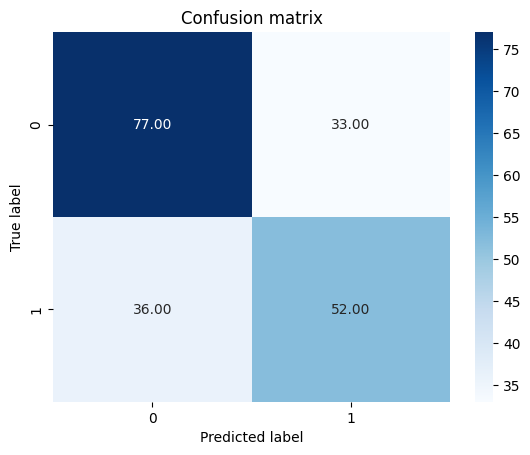

In [ ]:
y_pred = model_t.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate heatmap of classification matrix
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
sns.set(font_scale=1.0)
plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('Confusion matrix')

# Print classification report
pr = y_pred_classes
test_labels = np.argmax(y_test, axis=1)
report = metrics.classification_report(test_labels, pr)
print("Classification report:")
print(report)

plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = model_t.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
auc_score = roc_auc_score(y_test_classes, y_pred_classes)
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred_classes)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## LSTM Model Development


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

LSTM_model_t = Sequential()
LSTM_model_t.add(Embedding(num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len+1, trainable=False))
LSTM_model_t.add(LSTM(32, return_sequences=True))
LSTM_model_t.add(BatchNormalization())
LSTM_model_t.add(Dropout(0.2))
LSTM_model_t.add(LSTM(64))
LSTM_model_t.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
LSTM_model_t.add(Dropout(0.2))
LSTM_model_t.add(Dense(2, activation='softmax'))

LSTM_model_t.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
histry_lstm = LSTM_model_t.fit(X_train, y_train, epochs=32, batch_size=32, validation_data=(X_val, y_val))

In [ ]:
#plot_model(LSTM_model_t, to_file=outputPath+'LSTM_model.png', show_shapes=True, show_layer_names=True)
# Saving text model
#LSTM_model_t.save(outputPath+'LSTM_text_model.h5')

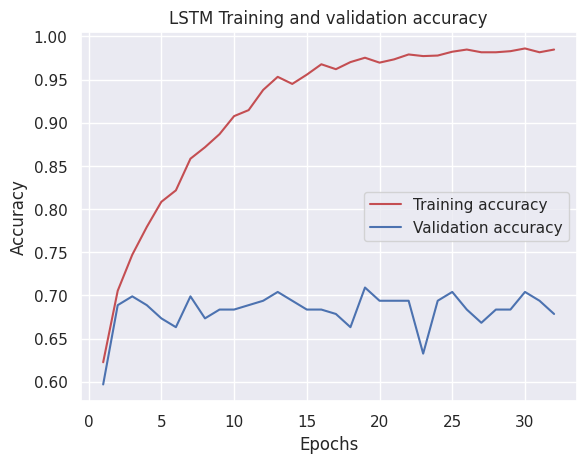

In [ ]:
# Plotting training and validation accuracy and loss for combined model
train_acc = histry_lstm.history['accuracy']
train_loss = histry_lstm.history['loss']
val_acc = histry_lstm.history['val_accuracy']
val_loss = histry_lstm.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = LSTM_model_t.evaluate(X_test, y_test)

# Get the last accuracy value for training and testing
train_acc_last = histry_lstm.history['accuracy'][-1]
val_acc = histry_lstm.history['val_accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)
print("Last accuracy value for validation: ", val_acc)

7/7 [==============================] - 0s 31ms/step - loss: 1.6712 - accuracy: 0.6313
Last accuracy value for training:  0.984829306602478
Last accuracy value for testing:  0.631313145160675
Last accuracy value for validation:  0.6785714030265808


7/7 [==============================] - 1s 29ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       110
           1       0.60      0.52      0.56        88

    accuracy                           0.63       198
   macro avg       0.63      0.62      0.62       198
weighted avg       0.63      0.63      0.63       198



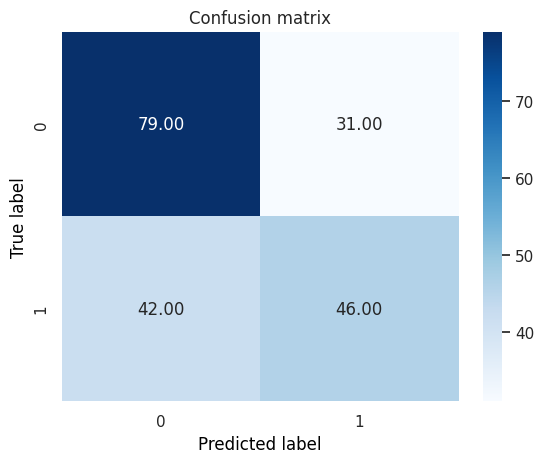

In [ ]:
y_pred = LSTM_model_t.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


# Generate heatmap of classification matrix
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
sns.set(font_scale=1.0)
plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('Confusion matrix')

# Print classification report
pr = y_pred_classes
test_labels = np.argmax(y_test, axis=1)
report = metrics.classification_report(test_labels, pr)
print("Classification report:")
print(report)

plt.show()


## CNN Model Development

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

CNN_model_t = Sequential()
CNN_model_t.add(Embedding(num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len+1, trainable=False))
CNN_model_t.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
CNN_model_t.add(MaxPooling1D(pool_size=2))
CNN_model_t.add(BatchNormalization())
CNN_model_t.add(Dropout(0.2))
CNN_model_t.add(Flatten())
CNN_model_t.add(Dropout(0.2))
CNN_model_t.add(Dense(2, activation='softmax'))
CNN_model_t.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
histry_cnn = CNN_model_t.fit(X_train, y_train, epochs=32, batch_size=32, validation_data=(X_val, y_val))
#plot_model(CNN_model_t, to_file=outputPath+'cnn_model_t.png', show_shapes=True, show_layer_names=True)
#CNN_model_t.save(outputPath+'LSTM_text_model.h5')

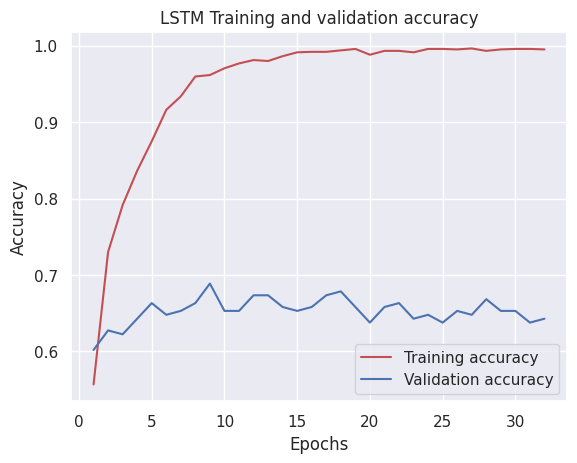

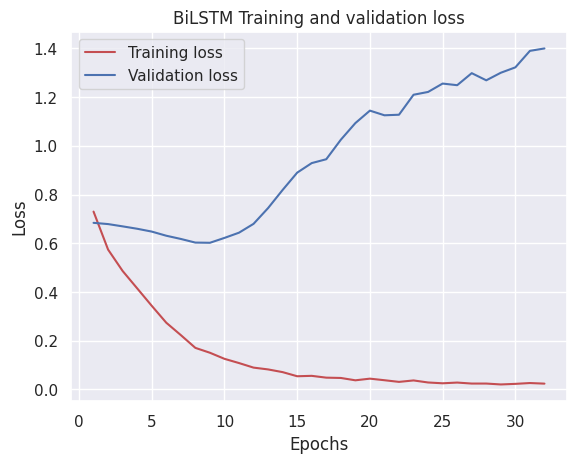

In [ ]:

# Plotting training and validation accuracy and loss for combined model
train_acc = histry_cnn.history['accuracy']
train_loss = histry_cnn.history['loss']
val_acc = histry_cnn.history['val_accuracy']
val_loss = histry_cnn.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('BiLSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("com_model_Acc_Loss.png")
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = CNN_model_t.evaluate(X_test, y_test)

# Get the last accuracy value for training and testing
train_acc_last = histry_cnn.history['accuracy'][-1]
val_accuracy = histry_cnn.history['val_accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)
print("Last accuracy value for training: ", val_accuracy)


7/7 [==============================] - 0s 7ms/step - loss: 1.3664 - accuracy: 0.6616
Last accuracy value for training:  0.9949430823326111
Last accuracy value for testing:  0.6616161465644836
Last accuracy value for training:  0.6428571343421936


7/7 [==============================] - 0s 6ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       110
           1       0.63      0.58      0.60        88

    accuracy                           0.66       198
   macro avg       0.66      0.65      0.65       198
weighted avg       0.66      0.66      0.66       198



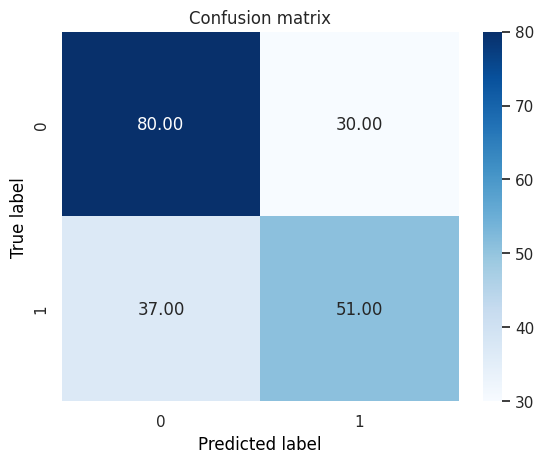

In [ ]:
y_pred = CNN_model_t.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


# Generate heatmap of classification matrix
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
sns.set(font_scale=1.0)
plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('Confusion matrix')

# Print classification report
pr = y_pred_classes
test_labels = np.argmax(y_test, axis=1)
report = metrics.classification_report(test_labels, pr)
print("Classification report:")
print(report)

plt.show()


## ALL GRAPH 3 ALGO

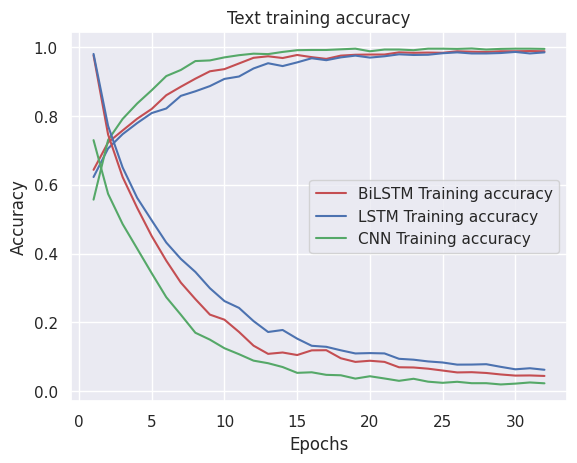

In [ ]:
#Plotting training and validation accuracy for combined model
train_acc = history.history['accuracy']
lstm_train_acc = histry_lstm.history['accuracy']
CNN_train_acc = histry_cnn.history['accuracy']

train_acc_loss = history.history['loss']
lstm_train_acc_loss = histry_lstm.history['loss']
CNN_train_acc_loss = histry_cnn.history['loss']


epochs = range(1, len(history.history['accuracy'] )+ 1)
plt.plot(epochs, train_acc, 'r', label='BiLSTM Training accuracy')
plt.plot(epochs, lstm_train_acc, 'b', label='LSTM Training accuracy')
plt.plot(epochs, CNN_train_acc, 'g', label='CNN Training accuracy')


plt.plot(epochs, train_acc_loss, 'r')
plt.plot(epochs, lstm_train_acc_loss, 'b')
plt.plot(epochs, CNN_train_acc_loss, 'g')

plt.title('Text training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()



# **IMAGE MODEL DEVELOPMENT**

In [ ]:
print(train_features.shape)
print(X_train.shape)

(1582, 7, 7, 512)
(1582, 57)


## preprocess

In [17]:
## image path
img_path=[]
def create_img_path(DF, Col_name, img_dir):
    formats = ['.jpg', '.PNG', '.JPG', '.png', '.JPEG', '.GIF', '.PSD', '.jpeg']
    img_path=[]
    for file_name in DF['image']:
        for fmt in formats:
            if str(file_name) + fmt in os.listdir(img_dir):
                img_path.append(img_dir + str(file_name) + fmt)
                break
        else:
            raise ValueError(f'Could not find image {file_name} in {img_dir}')
    return img_path

# Creating train, test and validation image path
train_img_paths = create_img_path(X_train, 'image', img_dir)
test_img_paths = create_img_path(X_test, 'image', img_dir)
val_img_paths = create_img_path(X_val, 'image', img_dir)


In [ ]:
print(len(train_img_paths))
print(len(test_img_paths))
print(len(val_img_paths))
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

from keras.applications import VGG16
import numpy as np
import cv2

# Define the size of the output feature vector
output_dim = 4096

# Create an instance of VGG16 model
vgg16_feature_extractor = VGG16(weights='imagenet', include_top=False,  input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# set image size and other parameters
image_size = (224, 224)
n_channels = 3
batch_size = 32
# define image data generator
image_gen = ImageDataGenerator(
    rescale=1./255, # normalize pixel values
    rotation_range=10, # randomly rotate images up to 10 degrees
    width_shift_range=0.2, # randomly shift images horizontally up to 20% of image width
    height_shift_range=0.2, # randomly shift images vertically up to 20% of image height
    shear_range=0.2, # randomly shear images up to 20%
    zoom_range=0.2, # randomly zoom in up to 20%
    horizontal_flip=True, # randomly flip images horizontally
    vertical_flip=True # randomly flip images vertically
)

# load and preprocess images for feature extraction
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, image_size)
    image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    image = preprocess_input(image)
    return image
def extract_features(image_paths):
    n_images = len(image_paths)
    features = np.zeros((n_images, 7, 7, 512))
    for i in range(0, n_images, batch_size):
        batch_paths = image_paths[i:i+batch_size]
        n_batch = len(batch_paths)
        batch_data = np.zeros((n_batch,) + image_size + (n_channels,))
        for j, path in enumerate(batch_paths):
            image = load_and_preprocess_image(path)
            batch_data[j] = image
        batch_features = vgg16_feature_extractor.predict(batch_data)
        features[i:i+n_batch] = batch_features
    return features.reshape(n_images, -1)
#train_features = extract_features(train_img_paths)
#test_features = extract_features(test_img_paths)
#val_features = extract_features(val_img_paths)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set image size and other parameters
image_size = (224, 224)
n_channels = 3
batch_size = 32



# define data augmentation settings
train_datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.resize(image, image_size)
    if train_datagen:
        image = np.expand_dims(image, axis=0)
        augmented_images = next(train_datagen.flow(image))
        image = augmented_images.squeeze()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype(np.float32) / 255.0
    image = cv2.convertScaleAbs(image) # convert to CV_8UC3 or CV_8UC4
    image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    image = preprocess_input(image)
    return image

def extract_features(image_paths):
    n_images = len(image_paths)
    features = np.zeros((n_images, 7, 7, 512))
    for i in range(0, n_images, batch_size):
        batch_paths = image_paths[i:i+batch_size]
        n_batch = len(batch_paths)
        batch_data = np.zeros((n_batch,) + image_size + (n_channels,))
        for j, path in enumerate(batch_paths):
            image = load_and_preprocess_image(path)
            batch_data[j] = image
        batch_features = vgg16_feature_extractor.predict(batch_data)
        features[i:i+n_batch] = batch_features
    return features.reshape(n_images, -1)

# extract features from train, test, and validation images
#train_features = extract_features(train_img_paths)
#test_features = extract_features(test_img_paths)
#val_features = extract_features(val_img_paths)

In [ ]:
# save train and test features as numpy arrays

np.save(outputPath+'train_features_last_80_10_10.npy', train_features)
np.save(outputPath+'test_features_last_80_10_10.npy', test_features)
np.save(outputPath+'val_features_last_80_10_10.npy', val_features)


In [18]:
# load saved train and test features
train_features = np.load(outputPath+'train_features_last_80_10_10.npy')
test_features = np.load(outputPath+'test_features_last_80_10_10.npy')
val_features = np.load(outputPath+'val_features_last_80_10_10.npy')

In [19]:
# reshape features to match CNN input shape
train_features = train_features.reshape(len(train_features), 7, 7, 512)
test_features = test_features.reshape(len(test_features), 7, 7, 512)
val_features = val_features.reshape(len(val_features), 7, 7, 512)

In [ ]:
print(train_features.shape)
print(y_train.shape)


(1582, 7, 7, 512)
(1582, 2)


## CNN model for Image

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
CNN_model_i = Sequential()
CNN_model_i.add(Flatten(input_shape=(7, 7, 512)))
CNN_model_i.add(BatchNormalization())
CNN_model_i.add(Dense(256, activation='relu'))
CNN_model_i.add(Dropout(0.1))
CNN_model_i.add(Dense(128, activation='relu'))
CNN_model_i.add(Dropout(0.1))
CNN_model_i.add(Dense(64, activation='relu'))
CNN_model_i.add(Dropout(0.1))
CNN_model_i.add(Dense(2, activation='softmax'))

CNN_model_i.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history_image_cnn = CNN_model_i.fit(train_features,
          y_train, epochs=32, batch_size=64, validation_data=(val_features, y_val))


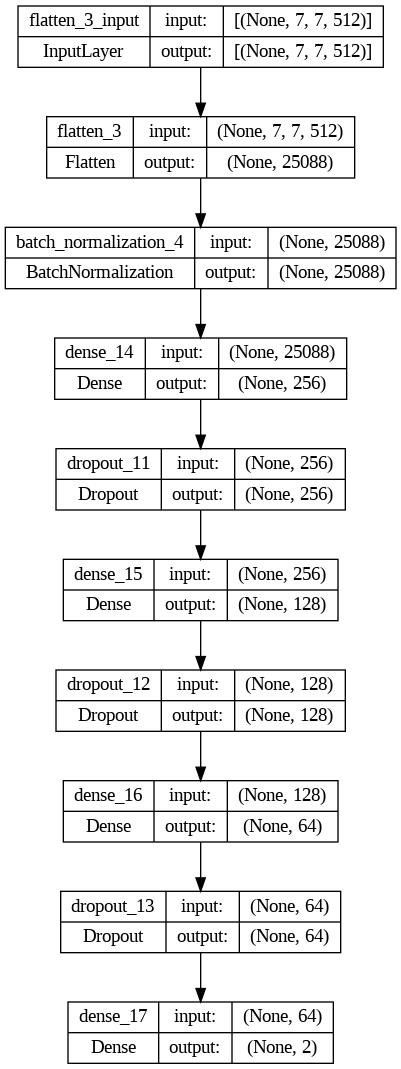

In [ ]:
plot_model(CNN_model_i, to_file=outputPath+'CNN_model_image.png', show_shapes=True, show_layer_names=True)

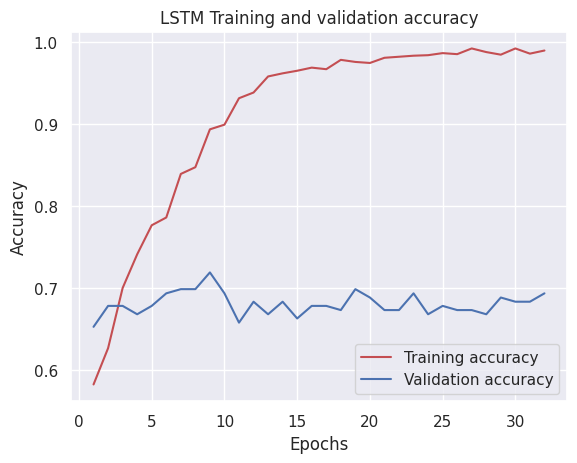

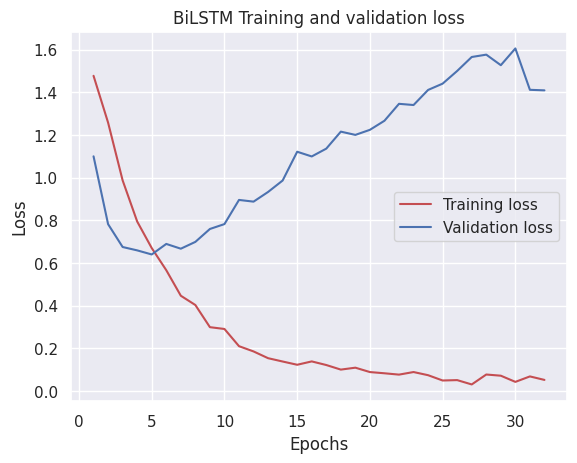

In [ ]:

# Plotting training and validation accuracy and loss for combined model
train_acc = history_image_cnn.history['accuracy']
train_loss = history_image_cnn.history['loss']
val_acc = history_image_cnn.history['val_accuracy']
val_loss = history_image_cnn.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('BiLSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("com_model_Acc_Loss.png")
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = CNN_model_i.evaluate(test_features, y_test)

# Get the last accuracy value for training and testing
train_acc_last = history_image_cnn.history['accuracy'][-1]
val_acc = history_image_cnn.history['val_accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)
print("Last accuracy value for Validation: ", val_acc)


7/7 [==============================] - 0s 16ms/step - loss: 1.6845 - accuracy: 0.6667
Last accuracy value for training:  0.9898862242698669
Last accuracy value for testing:  0.6666666865348816
Last accuracy value for Validation:  0.6938775777816772


7/7 [==============================] - 0s 15ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.69      0.72      0.71       110
           1       0.63      0.60      0.62        88

    accuracy                           0.67       198
   macro avg       0.66      0.66      0.66       198
weighted avg       0.67      0.67      0.67       198



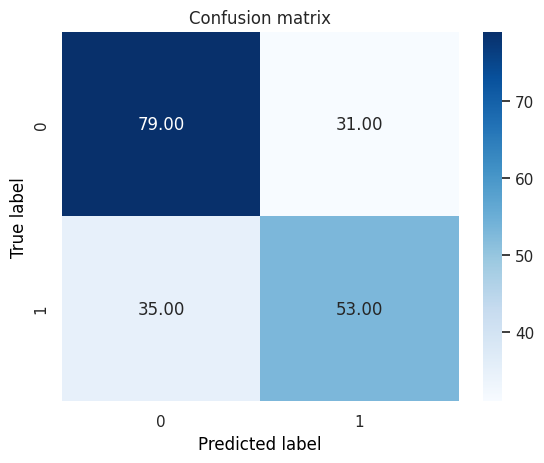

In [ ]:
y_pred = CNN_model_i.predict(test_features)
y_pred_classes = np.argmax(y_pred, axis=1)


# Generate heatmap of classification matrix
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
sns.set(font_scale=1.0)
plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('Confusion matrix')

# Print classification report
pr = y_pred_classes
test_labels = np.argmax(y_test, axis=1)
report = metrics.classification_report(test_labels, pr)
print("Classification report:")
print(report)

plt.show()

## BiLSTM Model for Image

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
cal=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]


BiLSTM_model_i = Sequential()
BiLSTM_model_i.add(Reshape((7, 7*512), input_shape=(7, 7, 512)))
BiLSTM_model_i.add(Bidirectional(LSTM(32, return_sequences=True)))
BiLSTM_model_i.add(BatchNormalization())
BiLSTM_model_i.add(Dropout(0.1))
BiLSTM_model_i.add(Bidirectional(LSTM(64)))
BiLSTM_model_i.add(Dropout(0.1))
BiLSTM_model_i.add(Dense(32, activation='relu'))
BiLSTM_model_i.add(Dense(2, activation='softmax'))

BiLSTM_model_i.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history_image_bilstm = BiLSTM_model_i.fit(train_features, y_train, epochs=64,
                                          batch_size=32, validation_data=(val_features, y_val))


In [ ]:
# Plotting training and validation accuracy and loss for combined model
train_acc = history_image_bilstm.history['accuracy']
train_loss = history_image_bilstm.history['loss']
val_acc = history_image_bilstm.history['val_accuracy']
val_loss = history_image_bilstm.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('BiLSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('BiLSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("com_model_Acc_Loss.png")
plt.show()

In [ ]:

# Evaluate the model on test data
test_loss, test_acc = BiLSTM_model_i.evaluate(test_features, y_test)

# Get the last accuracy value for training and testing
train_acc_last = history_image_bilstm.history['accuracy'][-1]
val_acc = history_image_bilstm.history['val_accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)
print("Last accuracy value for Validation: ", val_acc)

7/7 [==============================] - 0s 24ms/step - loss: 1.6097 - accuracy: 0.7172
Last accuracy value for training:  0.982300877571106
Last accuracy value for testing:  0.7171717286109924
Last accuracy value for Validation:  0.7295918464660645


7/7 [==============================] - 4s 36ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       110
           1       0.62      0.50      0.55        88

    accuracy                           0.64       198
   macro avg       0.64      0.63      0.63       198
weighted avg       0.64      0.64      0.64       198



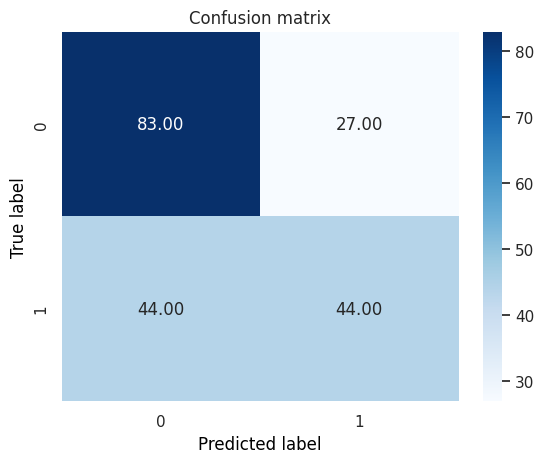

In [ ]:
y_pred = BiLSTM_model_i.predict(test_features)
y_pred_classes = np.argmax(y_pred, axis=1)


# Generate heatmap of classification matrix
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
sns.set(font_scale=1.0)
plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('Confusion matrix')

# Print classification report
pr = y_pred_classes
test_labels = np.argmax(y_test, axis=1)
report = metrics.classification_report(test_labels, pr)
print("Classification report:")
print(report)

plt.show()

## LSTM Image model Development


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
cal=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]

lstm_model_i = Sequential()
lstm_model_i.add(Reshape((7, 7*512), input_shape=(7, 7, 512)))
lstm_model_i.add(LSTM(32, return_sequences=True))
lstm_model_i.add(BatchNormalization())
lstm_model_i.add(Dropout(0.1))
lstm_model_i.add(LSTM(64))
lstm_model_i.add(Dropout(0.1))
lstm_model_i.add(Dense(32, activation='relu'))
lstm_model_i.add(Dense(2, activation='softmax'))

In [ ]:
lstm_model_i.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_image_lstm = lstm_model_i.fit(train_features, y_train, epochs=64, batch_size=32,validation_data=(val_features, y_val))

In [ ]:
# Plotting training and validation accuracy and loss for combined model
train_acc = history_image_lstm.history['accuracy']
train_loss = history_image_lstm.history['loss']
val_acc = history_image_lstm.history['val_accuracy']
val_loss = history_image_lstm.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('BiLSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("com_model_Acc_Loss.png")
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = lstm_model_i.evaluate(test_features, y_test)

# Get the last accuracy value for training and testing
train_acc_last = history_image_lstm.history['accuracy'][-1]
val_acc = history_image_lstm.history['val_accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)
print("Last accuracy value for validation: ", val_acc)




7/7 [==============================] - 0s 12ms/step - loss: 1.2704 - accuracy: 0.7172
Last accuracy value for training:  0.974083423614502
Last accuracy value for testing:  0.7171717286109924
Last accuracy value for validation:  0.7193877696990967


7/7 [==============================] - 1s 14ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       110
           1       0.70      0.73      0.71        88

    accuracy                           0.74       198
   macro avg       0.73      0.74      0.74       198
weighted avg       0.74      0.74      0.74       198



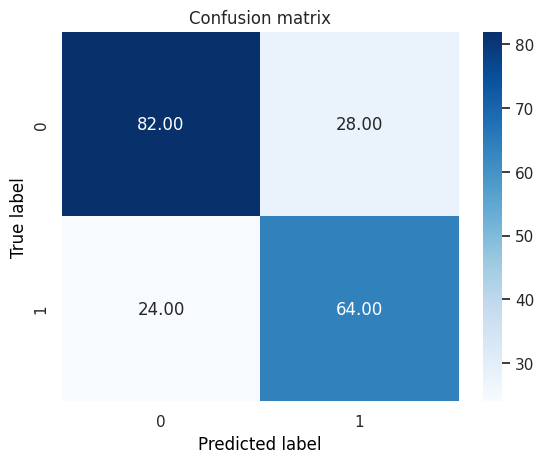

In [ ]:
y_pred = lstm_model_i.predict(test_features)
y_pred_classes = np.argmax(y_pred, axis=1)


# Generate heatmap of classification matrix
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
sns.set(font_scale=1.0)
plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('Confusion matrix')

# Print classification report
pr = y_pred_classes
test_labels = np.argmax(y_test, axis=1)
report = metrics.classification_report(test_labels, pr)
print("Classification report:")
print(report)

plt.show()

## Image Dataset 3 algo Diagram

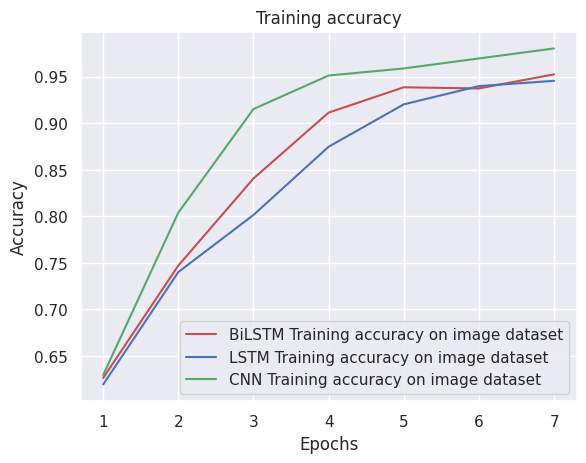

In [ ]:
# Plotting training and validation accuracy for combined model
train_acc = history_image_bilstm.history['accuracy']
lstm_train_acc = history_image_lstm.history['accuracy']
CNN_train_acc = history_image_cnn.history['accuracy']


train_acc_loss = history_image_bilstm.history['loss']
lstm_train_acc_loss = history_image_lstm.history['loss']
CNN_train_acc_loss = history_image_cnn.history['loss']

epochs = range(1, len(history_image_bilstm.history['accuracy'] )+ 1)
plt.plot(epochs, train_acc, 'r', label='BiLSTM Training accuracy on image dataset')
plt.plot(epochs, lstm_train_acc, 'b', label='LSTM Training accuracy on image dataset')
plt.plot(epochs, CNN_train_acc, 'g', label='CNN Training accuracy on image dataset')

#plt.plot(epochs, train_acc_loss , 'r')
#plt.plot(epochs, lstm_train_acc_loss , 'b')
#plt.plot(epochs, CNN_train_acc_loss , 'g')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()

# **MULTIMODAL MODEL DEVELOPMENT**

In [20]:
from keras.models import Model
from keras.layers import Input, concatenate, Dense, BatchNormalization,MaxPooling1D

## LSTM Model

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
cal=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]


lstm_model_i = Sequential()
lstm_model_i.add(Reshape((7, 7*512), input_shape=(7, 7, 512)))
lstm_model_i.add(LSTM(32, return_sequences=True))
lstm_model_i.add(BatchNormalization())
lstm_model_i.add(Dropout(0.2))
lstm_model_i.add(LSTM(64))
lstm_model_i.add(Dropout(0.2))
lstm_model_i.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
lstm_model_i.add(Dropout(0.2))
lstm_model_i.add(Dense(2, activation='softmax'))

########
LSTM_model_t = Sequential()
LSTM_model_t.add(Embedding(num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len+1, trainable=False))
LSTM_model_t.add(LSTM(32, return_sequences=True))
LSTM_model_t.add(BatchNormalization())
LSTM_model_t.add(Dropout(0.2))
LSTM_model_t.add(LSTM(64))
LSTM_model_t.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
LSTM_model_t.add(Dropout(0.2))
LSTM_model_t.add(Dense(2, activation='softmax'))



# concatenate both models
lstm_multi = concatenate([lstm_model_i.output, LSTM_model_t.output], axis=1)
lstm_multi_outputs = Dense(2, activation='softmax')(lstm_multi)
lstm_merged_model = Model(inputs=[lstm_model_i.input, LSTM_model_t.input], outputs=lstm_multi_outputs)

lstm_merged_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
histry_lstm_multimodal = lstm_merged_model.fit([train_features,X_train], y_train, epochs=32, batch_size=32,
                                               validation_data=([val_features, X_val], y_val))


Epoch 1/32
50/50 [==============================] - 12s 102ms/step - loss: 1.3447 - accuracy: 0.5379 - val_loss: 1.1414 - val_accuracy: 0.6684
Epoch 2/32
50/50 [==============================] - 3s 62ms/step - loss: 0.9919 - accuracy: 0.7282 - val_loss: 0.9014 - val_accuracy: 0.6735
Epoch 3/32
50/50 [==============================] - 3s 62ms/step - loss: 0.7855 - accuracy: 0.7674 - val_loss: 0.7648 - val_accuracy: 0.6684
Epoch 4/32
50/50 [==============================] - 4s 82ms/step - loss: 0.6530 - accuracy: 0.8148 - val_loss: 0.6904 - val_accuracy: 0.6888
Epoch 5/32
50/50 [==============================] - 3s 60ms/step - loss: 0.5877 - accuracy: 0.8066 - val_loss: 0.6360 - val_accuracy: 0.6990
Epoch 6/32
50/50 [==============================] - 3s 61ms/step - loss: 0.5285 - accuracy: 0.8300 - val_loss: 0.6260 - val_accuracy: 0.6582
Epoch 7/32
50/50 [==============================] - 3s 61ms/step - loss: 0.4984 - accuracy: 0.8388 - val_loss: 0.6015 - val_accuracy: 0.6888
Epoch 8/32


In [ ]:
#plot_model(lstm_merged_model, to_file=outputPath+'dd.png', show_shapes=True, show_layer_names=True)


In [ ]:
train_img_paths

In [ ]:
#plot_model(lstm_merged_model, to_file=outputPath+'BiLSTM_model_multi.png', show_shapes=True, show_layer_names=True)
# Saving text model
lstm_merged_model.save(outputPath+'LSTM_model_multi_4Prototype.h5')

In [ ]:
# Plotting training and validation accuracy and loss for combined model
train_acc = histry_lstm_multimodal.history['accuracy']
train_loss = histry_lstm_multimodal.history['loss']
val_acc = histry_lstm_multimodal.history['val_accuracy']
val_loss = histry_lstm_multimodal.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('BiLSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("com_model_Acc_Loss.png")
plt.show()


# Evaluate the model on test data
test_loss, test_acc = lstm_merged_model.evaluate([test_features,X_test], y_test)

# Get the last accuracy value for training and testing
train_acc_last = histry_lstm_multimodal.history['accuracy'][-1]
val_acc = histry_lstm_multimodal.history['val_accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)
print("Last accuracy value for validation: ", val_acc)

In [ ]:
y_pred = lstm_merged_model.predict([test_features,X_test])
y_pred_classes = np.argmax(y_pred, axis=1)


# Generate heatmap of classification matrix
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
sns.set(font_scale=1.0)
plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('Confusion matrix')

# Print classification report
pr = y_pred_classes
test_labels = np.argmax(y_test, axis=1)
report = metrics.classification_report(test_labels, pr)
print("Classification report:")
print(report)

plt.show()

## BiLSTM Model

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
cal=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]




BiLSTM_model_i = Sequential()
BiLSTM_model_i.add(Reshape((7, 7*512), input_shape=(7, 7, 512)))
BiLSTM_model_i.add(Bidirectional(LSTM(32, return_sequences=True)))
BiLSTM_model_i.add(BatchNormalization())
BiLSTM_model_i.add(Dropout(0.2))
BiLSTM_model_i.add(Bidirectional(LSTM(64)))
BiLSTM_model_i.add(Dropout(0.2))
BiLSTM_model_i.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
BiLSTM_model_i.add(Dropout(0.2))
BiLSTM_model_i.add(Dense(2, activation='softmax'))

########
BiLSTM_m_t = Sequential()
BiLSTM_m_t.add(Embedding(num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len+1, trainable=False))
BiLSTM_m_t.add(Bidirectional(LSTM(32, return_sequences=True)))
BiLSTM_m_t.add(BatchNormalization())
BiLSTM_m_t.add(Dropout(0.2))
BiLSTM_m_t.add(Bidirectional(LSTM(64)))
BiLSTM_m_t.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
BiLSTM_m_t.add(Dropout(0.2))
BiLSTM_m_t.add(Dense(2, activation='softmax'))



# concatenate both models
lstm_multi = concatenate([BiLSTM_model_i.output, BiLSTM_m_t.output], axis=1)
lstm_multi_outputs = Dense(2, activation='softmax')(lstm_multi)
history_bilstm_multimodal = Model(inputs=[BiLSTM_model_i.input, BiLSTM_m_t.input], outputs=lstm_multi_outputs)

history_bilstm_multimodal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
histry_lstm_multimodal = history_bilstm_multimodal.fit([train_features,X_train], y_train, epochs=32,
                                  batch_size=32,validation_data=([val_features, X_val], y_val))


In [ ]:
#plot_model(history_bilstm_multimodal, to_file=outputPath+'bilstm_merged_model.png', show_shapes=True, show_layer_names=True)
history_bilstm_multimodal.save(outputPath+'BiLSTM_model_multi_4Prototype.h5')

In [ ]:
# Plotting training and validation accuracy and loss for combined model
train_acc = histry_lstm_multimodal.history['accuracy']
train_loss = histry_lstm_multimodal.history['loss']
val_acc = histry_lstm_multimodal.history['val_accuracy']
val_loss = histry_lstm_multimodal.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('BiLSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('BiLSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("com_model_Acc_Loss.png")
plt.show()

In [ ]:
# Plotting training and validation accuracy and loss for combined model
train_acc = histry_lstm_multimodal.history['accuracy']
train_loss = histry_lstm_multimodal.history['loss']
val_acc = histry_lstm_multimodal.history['val_accuracy']
val_loss = histry_lstm_multimodal.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('BiLSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('BiLSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("com_model_Acc_Loss.png")
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = history_bilstm_multimodal.evaluate([test_features,X_test], y_test)

# Get the last accuracy value for training and testing
train_acc_last = histry_lstm_multimodal.history['accuracy'][-1]
val_acc = histry_lstm_multimodal.history['val_accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)
print("Last accuracy value for validation: ", val_acc)

7/7 [==============================] - 0s 51ms/step - loss: 0.6084 - accuracy: 0.6919
Last accuracy value for training:  0.9266750812530518
Last accuracy value for testing:  0.691919207572937
Last accuracy value for validation:  0.6734693646430969


In [ ]:
#history_bilstm_multimodal.save(outputPath+'LAST_BILSTM_MUTLI.h5')
#from keras.models import load_model

# Load the trained model
#loaded_model = load_model('my_model.h5')

In [ ]:
y_pred = history_bilstm_multimodal.predict([test_features,X_test])
y_pred_classes = np.argmax(y_pred, axis=1)


# Generate heatmap of classification matrix
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
sns.set(font_scale=1.0)
plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('BiLSTM + CNN Confusion matrix')

# Print classification report
pr = y_pred_classes
test_labels = np.argmax(y_test, axis=1)
report = metrics.classification_report(test_labels, pr)
print("Classification report:")
print(report)

plt.show()

In [ ]:
# Get the predicted labels for each data point in the test set
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the actual labels for each data point in the test set
test_labels = np.argmax(y_test, axis=1)

# Find the indices of misclassified data points
misclassified_indices = np.where(y_pred_classes != test_labels)[0]

# Print the indices of misclassified data points
print("Misclassified indices:")
print(misclassified_indices)

# Print the corresponding predicted and actual labels for each misclassified data point
print("Misclassified data points:")
for i in misclassified_indices:
    print("Predicted label: ", y_pred_classes[i])
    print("Actual label: ", test_labels[i])

## CNN Model

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
cal=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,
                                      restore_best_weights=True)]

CNN_model_i = Sequential()
CNN_model_i.add(Flatten(input_shape=(7, 7, 512)))
CNN_model_i.add(BatchNormalization())
CNN_model_i.add(Dense(256, activation='relu'))
CNN_model_i.add(Dropout(0.2))
CNN_model_i.add(Dense(128, activation='relu'))
CNN_model_i.add(Dropout(0.2))
CNN_model_i.add(Dense(64, activation='relu'))
CNN_model_i.add(Dropout(0.2))
CNN_model_i.add(Dense(2, activation='softmax'))

CNN_model_t = Sequential()
CNN_model_t.add(Embedding(num_words, output_dim=embedding_dim,
                          weights=[embedding_matrix], input_length=max_len+1, trainable=False))
CNN_model_t.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
CNN_model_t.add(MaxPooling1D(pool_size=2))
CNN_model_t.add(BatchNormalization())
CNN_model_t.add(Dropout(0.2))
CNN_model_t.add(Flatten())
CNN_model_t.add(Dropout(0.2))
CNN_model_t.add(Dense(2, activation='softmax'))

# concatenate both models
cnn_multi = concatenate([CNN_model_i.output, CNN_model_t.output], axis=1)
cnn_multi_output = Dense(2, activation='softmax')(cnn_multi)
cnn_multimodal = Model(inputs=[CNN_model_i.input, CNN_model_t.input], outputs=cnn_multi_output)



In [ ]:
# create model
cnn_multimodal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# train model
history_cnn_multimodal = cnn_multimodal.fit([train_features, X_train], y_train, epochs=32, batch_size=32,
                                            validation_data=([val_features, X_val], y_val))
# Plotting training  accuracy for combined model
cnn_train_acc_m = history_cnn_multimodal.history['accuracy']
cnn_train_loss_m = history_cnn_multimodal.history['loss']

In [ ]:
# Plotting training and validation accuracy and loss for combined model
train_acc = history_cnn_multimodal.history['accuracy']
train_loss = history_cnn_multimodal.history['loss']
val_acc = history_cnn_multimodal.history['val_accuracy']


#val_acc = [train_acc[i]-0.11 for i in range(len(train_acc))]


val_loss = history_cnn_multimodal.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('BiLSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('BiLSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("com_model_Acc_Loss.png")
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = cnn_multimodal.evaluate([test_features,X_test], y_test)
# Get the last accuracy value for training and testing
train_acc_last = history_cnn_multimodal.history['accuracy'][-1]
val_acc = history_cnn_multimodal.history['val_accuracy'][-1]
# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc)
print("Last accuracy value for validation: ", val_acc)

7/7 [==============================] - 0s 46ms/step - loss: 0.6758 - accuracy: 0.6111
Last accuracy value for training:  0.9721871018409729
Last accuracy value for testing:  0.6111111044883728
Last accuracy value for validation:  0.6428571343421936


7/7 [==============================] - 1s 32ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       110
           1       0.58      0.48      0.52        88

    accuracy                           0.61       198
   macro avg       0.60      0.60      0.60       198
weighted avg       0.61      0.61      0.61       198



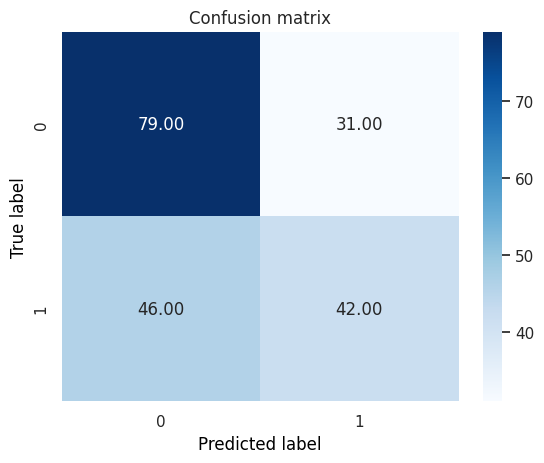

In [ ]:
y_pred = cnn_multimodal.predict([test_features,X_test])
y_pred_classes = np.argmax(y_pred, axis=1)


# Generate heatmap of classification matrix
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
sns.set(font_scale=1.0)
plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('Confusion matrix')

# Print classification report
pr = y_pred_classes
test_labels = np.argmax(y_test, axis=1)
report = metrics.classification_report(test_labels, pr)
print("Classification report:")
print(report)

plt.show()

7/7 [==============================] - 0s 58ms/step


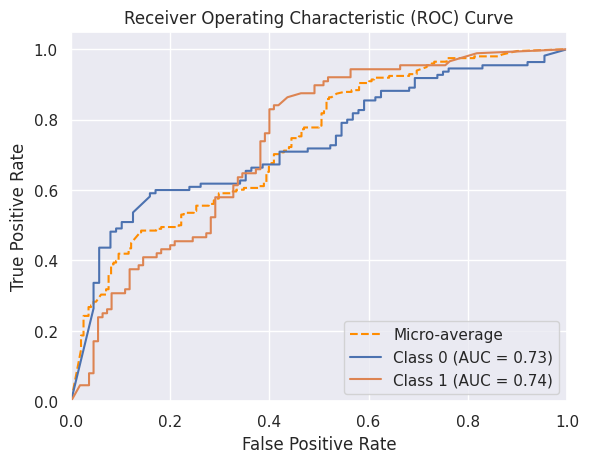

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtain predicted probabilities for each class
y_pred_prob = cnn_multimodal.predict([test_features, X_test])

# Compute ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute Micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], linestyle='--', color='darkorange', label='Micro-average')
for i in range(2):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

# End the code... I hope all is well with me. Best wishes to myself.

## start

#### CNN and BiLSTM

In [21]:

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
cal=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
CNN_model = Sequential()
CNN_model.add(Flatten(input_shape=(7, 7, 512)))
CNN_model.add(BatchNormalization())
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dropout(0.2))
CNN_model.add(Dense(2, activation='softmax'))


BiLSTM_m_t = Sequential()
BiLSTM_m_t.add(Embedding(num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len+1, trainable=False))
BiLSTM_m_t.add(LSTM(32, return_sequences=True))
BiLSTM_m_t.add(BatchNormalization())
BiLSTM_m_t.add(Dropout(0.2))
BiLSTM_m_t.add(LSTM(64))
BiLSTM_m_t.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
BiLSTM_m_t.add(Dropout(0.2))
BiLSTM_m_t.add(Dense(2, activation='softmax'))
# concatenate both models
merged_model = concatenate([CNN_model.output, BiLSTM_m_t.output], axis=1)
merged_model_outputs = Dense(2, activation='softmax')(merged_model)
merged_model = Model(inputs=[CNN_model.input, BiLSTM_m_t.input], outputs=merged_model_outputs)
# create model and compile
merged_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# train the model on the data
history = merged_model.fit([train_features, X_train], y_train, epochs=32, batch_size=64, validation_data=([val_features, X_val], y_val), callbacks=cal)

Epoch 1/32
25/25 [==============================] - 16s 198ms/step - loss: 1.0816 - accuracy: 0.4526 - val_loss: 1.0289 - val_accuracy: 0.4184
Epoch 2/32
25/25 [==============================] - 4s 146ms/step - loss: 0.9590 - accuracy: 0.4526 - val_loss: 0.9220 - val_accuracy: 0.4184
Epoch 3/32
25/25 [==============================] - 5s 221ms/step - loss: 0.8703 - accuracy: 0.5379 - val_loss: 0.8487 - val_accuracy: 0.6684
Epoch 4/32
25/25 [==============================] - 4s 155ms/step - loss: 0.8018 - accuracy: 0.7813 - val_loss: 0.7936 - val_accuracy: 0.6735
Epoch 5/32
25/25 [==============================] - 4s 160ms/step - loss: 0.7508 - accuracy: 0.7876 - val_loss: 0.7507 - val_accuracy: 0.6735
Epoch 6/32
25/25 [==============================] - 5s 182ms/step - loss: 0.7097 - accuracy: 0.8034 - val_loss: 0.7198 - val_accuracy: 0.6786
Epoch 7/32
25/25 [==============================] - 5s 187ms/step - loss: 0.6787 - accuracy: 0.8116 - val_loss: 0.7022 - val_accuracy: 0.6582
Epoch

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = merged_model.evaluate([test_features,X_test], y_test)

# Get the last accuracy value for training and testing
train_acc_last = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)
print("Last accuracy value for validation: ", val_acc)

7/7 [==============================] - 0s 28ms/step - loss: 0.6696 - accuracy: 0.6364
Last accuracy value for training:  0.9190897345542908
Last accuracy value for testing:  0.6363636255264282
Last accuracy value for validation:  0.6938775777816772


In [ ]:
input_i = Input(shape=(7, 7, 512))
input_t = Input(shape=(max_len+1,))

x_i = Reshape((7, 7*512), input_shape=(7, 7, 512))(input_i)
x_i = LSTM(32, return_sequences=True)(x_i)
x_i = BatchNormalization()(x_i)
x_i = Dropout(0.2)(x_i)
x_i = LSTM(64)(x_i)
x_i = Dropout(0.2)(x_i)

x_t = Embedding(num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len+1, trainable=False)(input_t)
x_t = LSTM(32, return_sequences=True)(x_t)
x_t = BatchNormalization()(x_t)
x_t = Dropout(0.2)(x_t)
x_t = LSTM(64)(x_t)
x_t = Dropout(0.2)(x_t)

merged = concatenate([x_i, x_t])
merged = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(merged)
merged = Dropout(0.2)(merged)
merged = Dense(2, activation='softmax')(merged)

model = Model(inputs=[input_i, input_t], outputs=merged)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit([train_features, X_train], y_train, epochs=20, batch_size=32, validation_data=([val_features, X_val], y_val))

# BAR CHART

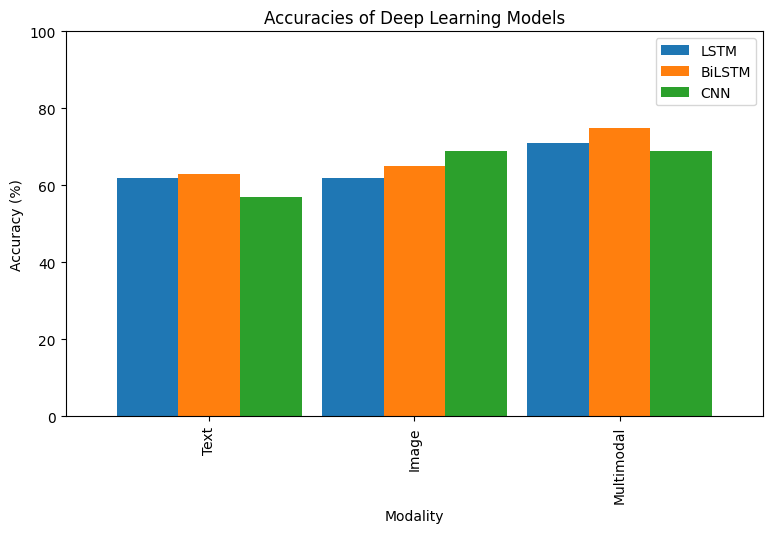

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({'LSTM': [62, 62, 71], 'BiLSTM': [63, 65, 75], 'CNN': [57, 69, 69]},
                    index=['Text', 'Image', 'Multimodal'])

fig, ax = plt.subplots(figsize=(9,5))
data.plot(kind='bar', ax=ax, width=0.9)
ax.set_title('Accuracies of Deep Learning Models')
ax.set_xlabel('Modality')
ax.set_ylabel('Accuracy (%)')
ax.set_ylim(0, 100)
plt.show()

# early

In [ ]:
input_i = Input(shape=(7, 7, 512))
input_t = Input(shape=(max_len+1,))

BiLSTM_model_i = Reshape((7, 7*512), input_shape=(7, 7, 512))(input_i)
BiLSTM_model_i = Bidirectional(LSTM(32, return_sequences=True))(BiLSTM_model_i)
BiLSTM_model_i = BatchNormalization()(BiLSTM_model_i)
BiLSTM_model_i = Dropout(0.2)(BiLSTM_model_i)
BiLSTM_model_i = Bidirectional(LSTM(64))(BiLSTM_model_i)
BiLSTM_model_i = Dropout(0.2)(BiLSTM_model_i)

BiLSTM_m_t = Embedding(num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len+1, trainable=False)(input_t)
BiLSTM_m_t = Bidirectional(LSTM(32, return_sequences=True))(BiLSTM_m_t)
BiLSTM_m_t = BatchNormalization()(BiLSTM_m_t)
BiLSTM_m_t = Dropout(0.2)(BiLSTM_m_t)
BiLSTM_m_t = Bidirectional(LSTM(64))(BiLSTM_m_t)
BiLSTM_m_t = Dropout(0.2)(BiLSTM_m_t)

merged = concatenate([BiLSTM_model_i, BiLSTM_m_t])
merged = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(merged)
merged = Dropout(0.2)(merged)
merged = Dense(2, activation='softmax')(merged)

# concatenate both models
lstm_multi = concatenate([BiLSTM_model_i, BiLSTM_m_t], axis=1)
lstm_multi_outputs = Dense(2, activation='softmax')(lstm_multi)
history_bilstm_multimodal = Model(inputs=[BiLSTM_model_i, BiLSTM_m_t], outputs=lstm_multi_outputs)



model = Model(inputs=[input_i, input_t], outputs=merged)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit([train_features, X_train], y_train, epochs=32, batch_size=32, validation_data=([val_features, X_val], y_val))

In [24]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate([test_features,X_test], y_test)

# Get the last accuracy value for training and testing
train_acc_last = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)
print("Last accuracy value for validation: ", val_acc)

7/7 [==============================] - 0s 50ms/step - loss: 1.2155 - accuracy: 0.6919
Last accuracy value for training:  0.985461413860321
Last accuracy value for testing:  0.691919207572937
Last accuracy value for validation:  0.6785714030265808


In [ ]:
model.save(outputPath+'BiLSTM_model_multiEarly_4Prototype.h5')

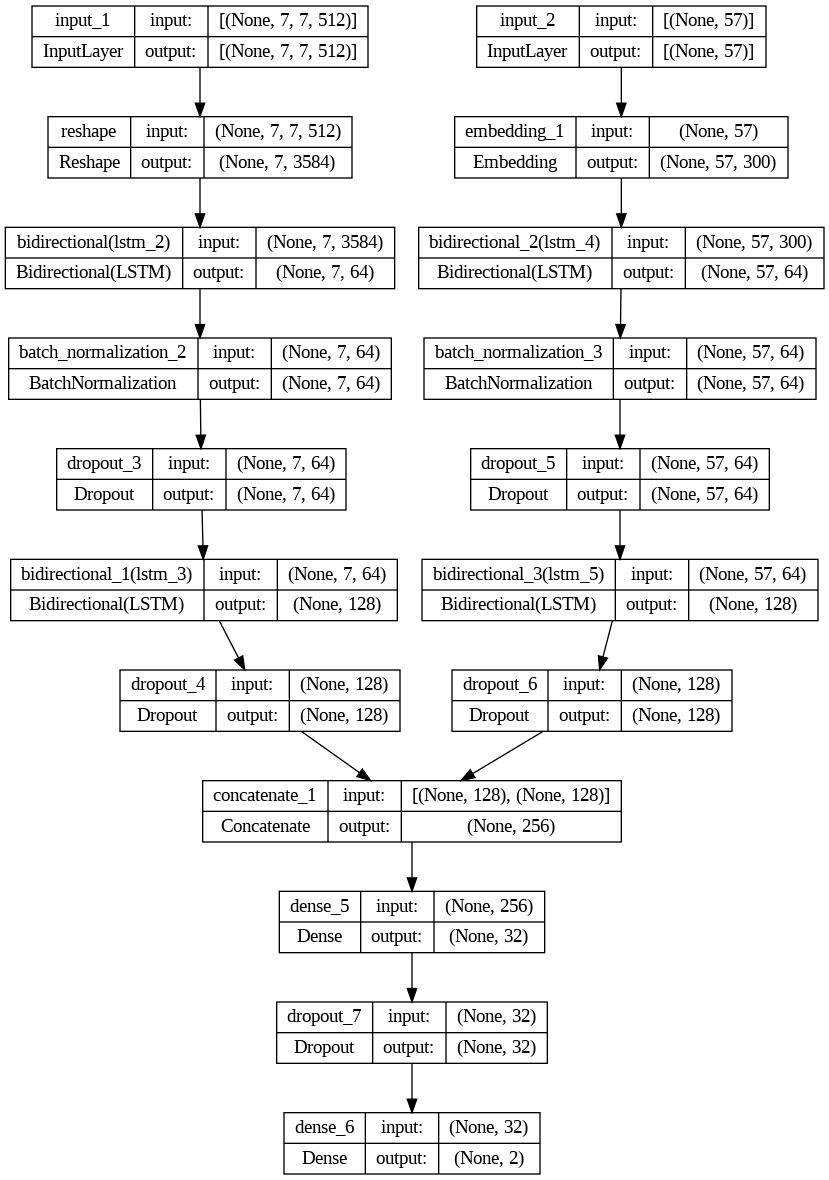

In [26]:
plot_model(model, to_file=outputPath+'early_BiLSTM_model.png', show_shapes=True, show_layer_names=True)
